In [1]:
# importing Qiskit
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit.visualization import plot_histogram

In [2]:
switching3x3 = {
    0: [0, 1, 3],
    1: [0, 1, 2, 4],
    2: [1, 2, 5],
    3: [0, 3, 4, 6],
    4: [1, 3, 4, 5, 7],
    5: [2, 4, 5, 8],
    6: [3, 6, 7],
    7: [4, 6, 7, 8],
    8: [5, 7, 8]
}


In [4]:
def init(x):
    n = int(len(x)**(1/2))
    f_in = QuantumRegister(len(x), name='x')
    f_out = QuantumRegister(len(x), name='y')
    f_oracle = QuantumRegister(1, name='o')
    f_res = ClassicalRegister(len(x), name='c')
    f = []
    f.append(f_in)
    f.append(f_out)
    f.append(f_oracle)
    f.append(f_res)
    cq = QuantumCircuit(f_in, f_out, f_oracle, f_res) 
    cq.x(f_oracle)
    cq.h(f_oracle)
    for i in range(len(x)):
        if x[i]:
            cq.x(i)
    cq.h(f_out)
    cq.barrier()
    return cq, f
    
def function(cq, f):
    for n, lights in switching3x3.items():
        for i in lights:
            cq.cx(f[1][i],f[0][n])
    cq.barrier()
    return cq
    
def oracle(cq, f):
    cq.x(f[0])
    cq.mcx(f[0], f[2])
    cq.x(f[0])
    cq.barrier()
    return cq
    
def diffusion(cq, f):
    cq.h(f[1])
    cq.x(f[1])
    cq.h(f[1][-1])
    cq.mcx(f[1][0:-1], f[1][-1])
    cq.h(f[1][-1])
    cq.x(f[1])
    cq.h(f[1])
    cq.barrier()
    return cq


def lightsout_iter(cq,f):
    cq = function(cq,f)
    cq = oracle(cq,f)
    cq = function(cq,f)
    cq = diffusion(cq,f)
    return cq
    
def lightsout_cq(x):
    cq, f = init(x)
    for i in range(3):
        cq = lightsout_iter(cq,f)
    cq.h(f[2])
    cq.x(f[2])
    cq.barrier()
    cq.measure(f[1],f[3])
    return cq

In [5]:
cq = lightsout_cq([0,1,0,1,1,1,0,1,0])
cq = cq.reverse_bits() 
#print(cq.draw(output="mpl", style="clifford"))

{'000111101': 1, '010100100': 1, '000010110': 1, '100011101': 2, '010111010': 1, '001111100': 1, '101001101': 2, '111010101': 1, '011111010': 1, '000001100': 2, '000110001': 2, '001110100': 1, '100011111': 1, '100101101': 4, '111000101': 3, '101110111': 1, '001001101': 3, '101101011': 2, '110110011': 1, '000101100': 3, '010101010': 4, '011000110': 1, '011000011': 1, '001110110': 2, '101011010': 2, '000000111': 2, '100010001': 1, '010001100': 2, '001001010': 3, '000000000': 4, '111011010': 3, '101010011': 5, '011100100': 3, '110100001': 3, '010101011': 1, '100000111': 3, '001010000': 3, '010110001': 3, '101000111': 1, '000110101': 4, '110110100': 2, '111000100': 2, '110010010': 4, '101000110': 3, '011110111': 5, '000010111': 2, '111110011': 4, '010101110': 1, '001101101': 3, '010010100': 3, '111111001': 4, '100110000': 3, '100001111': 3, '010001000': 3, '101010101': 3, '001111111': 3, '001000000': 5, '010111001': 5, '011011011': 3, '101101000': 3, '110101101': 2, '001001001': 1, '011010

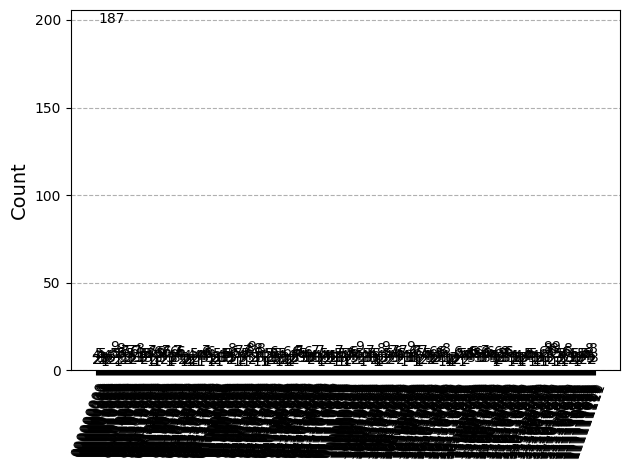

In [6]:
sim = AerSimulator()
job = sim.run(cq, shots = 2048)
results = job.result()
answer = results.get_counts()
print(answer)
print(plot_histogram(answer))

In [7]:
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
from qiskit import transpile

In [ ]:
fake_backend = FakeBrisbane()
sim_fake = AerSimulator.from_backend(fake_backend)
fake_result = sim_fake.run(transpile(cq,sim_fake)).result()
fake_ans = fake_result.get_counts()
print(fake_ans)

In [ ]:
print(plot_histogram(fake_ans))

In [ ]:
plot=plot_histogram(answer)
plot.xtick(rotation=90)
print(plot)